In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://github.com/2256haradityam/dataset/raw/refs/heads/main/bcn.csv')

In [3]:
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,39,1,34,2,0,3,1,1,0
1,0,49,1,24,2,0,2,2,3,0
2,0,49,1,24,2,0,2,1,1,0
3,0,69,2,19,2,0,2,2,2,0
4,0,49,1,4,2,0,2,2,4,0


In [4]:
dfn = df.copy()

In [5]:
dfn['breast'].value_counts()

,count
breast,
1,151
2,134


In [6]:
dfn['breast'] = dfn['breast'].map({1: 0, 2: 1})

In [30]:
mean_0 = 2.556824
mean_1 = 6.254197

dfn['binary_column'] = dfn['new_column'].apply(lambda x: 1 if x >= (mean_0 + mean_1) / 2 else 0)

In [7]:
columns_to_encode = ['age', 'inv-nodes', 'deg-malig', 'tumor-size', 'irradiat', 'breast-quad', 'menopause']
df_encoded = pd.get_dummies(dfn, columns=columns_to_encode)

# Convert only the columns created from `columns_to_encode` to int
encoded_columns = df_encoded.columns[df_encoded.columns.str.contains('|'.join(columns_to_encode))]
df_encoded[encoded_columns] = df_encoded[encoded_columns].astype(int)


In [8]:
import pandas as pd
from scipy.stats import pearsonr

# Define ranges for numerator and denominator power ratios
numerator_powers = range(1, 20)
denominator_powers = range(1, 20)

# Initialize variables to store the best power ratios and correlation
best_numerator_power = 0
best_denominator_power = 0
best_correlation = -1

# Iterate through different power ratios
for numerator_power in numerator_powers:
    for denominator_power in denominator_powers:
        dfn['new_column'] = ((dfn['tumor-size'] * dfn['inv-nodes'] * dfn['deg-malig'])**numerator_power)/((dfn['age']*dfn['menopause'])**denominator_power)
        correlation = pearsonr(dfn['new_column'], dfn['class'])[0]
        if correlation > best_correlation:
            best_numerator_power = numerator_power
            best_denominator_power = denominator_power
            best_correlation = correlation

# Apply the best power ratios to calculate the final 'new_column'
dfn['new_column'] = ((dfn['tumor-size'] * dfn['inv-nodes'] * dfn['deg-malig'])**best_numerator_power)/((dfn['age']*dfn['menopause'])**best_denominator_power)

print("Best numerator power:", best_numerator_power)
print("Best denominator power:", best_denominator_power)
print("Best correlation:", best_correlation)

Best numerator power: 1
Best denominator power: 1
Best correlation: 0.313585457213801


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_encoded['new_column'] = scaler.fit_transform(dfn[['new_column']])

<Axes: >

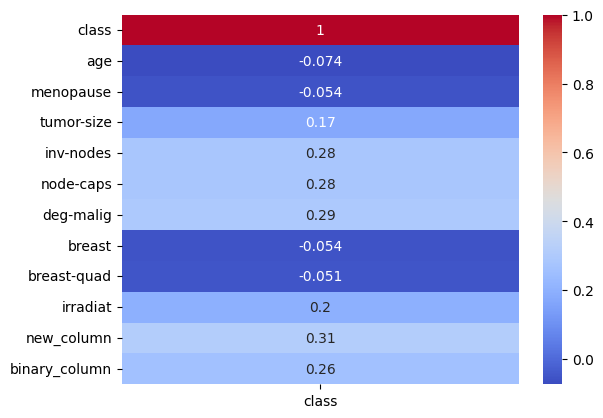

In [33]:
sns.heatmap(dfn.corr()[['class']], annot=True, cmap='coolwarm')

In [28]:
print(dfn[(dfn['class'] == 1)].groupby('class').mean().to_string())

            age  menopause  tumor-size  inv-nodes  node-caps  deg-malig    breast  breast-quad  irradiat  new_column
class                                                                                                               
1      54.47619   1.452381   31.202381   5.071429   0.369048   2.380952  0.428571      2.02381  0.369048    6.254197


class

0      56.114428   1.517413   27.208955   2.955224   0.124378   1.905473  0.487562     2.159204   0.18408    2.556824

1      54.47619   1.452381   31.202381   5.071429   0.369048   2.380952  0.428571      2.02381  0.369048    6.254197

In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   class          285 non-null    int64  
 1   node-caps      285 non-null    int64  
 2   breast         285 non-null    int64  
 3   age_29         285 non-null    int64  
 4   age_39         285 non-null    int64  
 5   age_49         285 non-null    int64  
 6   age_59         285 non-null    int64  
 7   age_69         285 non-null    int64  
 8   age_79         285 non-null    int64  
 9   inv-nodes_2    285 non-null    int64  
 10  inv-nodes_5    285 non-null    int64  
 11  inv-nodes_8    285 non-null    int64  
 12  inv-nodes_11   285 non-null    int64  
 13  inv-nodes_14   285 non-null    int64  
 14  inv-nodes_17   285 non-null    int64  
 15  inv-nodes_26   285 non-null    int64  
 16  deg-malig_1    285 non-null    int64  
 17  deg-malig_2    285 non-null    int64  
 18  deg-malig_

In [13]:
df_encoded.head()

,class,node-caps,breast,age_29,age_39,age_49,age_59,age_69,age_79,inv-nodes_2,...,irradiat_1,breast-quad_1,breast-quad_2,breast-quad_3,breast-quad_4,breast-quad_5,menopause_1,menopause_2,menopause_3,new_column
0,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0.294699
1,0,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,-0.313896
2,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,-0.313896
3,0,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,-0.575904
4,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,-0.617609


In [34]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Assuming 'df_encoded' is your encoded DataFrame with the target column 'class'
target_column = 'class'

# Split into features and target
X = df_encoded.drop(target_column, axis=1)
y = df_encoded[target_column]

# Apply PCA for dimensionality reduction (optional)
pca = PCA()
X_pca = pca.fit_transform(X)

# Perform Gini index-based feature selection using RandomForestClassifier
rf_selector = RandomForestClassifier(n_estimators=100, criterion='gini', n_jobs=-1)
rf_selector.fit(X_pca, y)

# Duplicate the data 10 times
X_duplicated = pd.concat([pd.DataFrame(X_pca)] * 10, ignore_index=True)
y_duplicated = pd.concat([y] * 10, ignore_index=True)

# Combine features and target for easier manipulation
df_duplicated = pd.concat([X_duplicated, y_duplicated], axis=1)

# Insert rows ensuring a minimum gap of 3 between duplicates
final_data = []
for i in range(10):
    gap_start = i * 3
    final_data[gap_start:gap_start] = df_duplicated.iloc[i * len(df_encoded):(i + 1) * len(df_encoded)].values.tolist()

# Convert back to DataFrame after interspersing duplicates
df_interspersed = pd.DataFrame(final_data, columns=list(df_duplicated.columns))

# Shuffle the final DataFrame in a highly random order
df_shuffled = df_interspersed.sample(frac=1, random_state=42).reset_index(drop=True)

# Split shuffled data back into features and target
X_shuffled = df_shuffled.drop(target_column, axis=1)
y_shuffled = df_shuffled[target_column]

# Define classifiers and parameter grids
classifiers = {
    'DecisionTree': DecisionTreeClassifier(),
    'NaiveBayes': GaussianNB(),
    'SVM': SVC(),
    'ZeroR': DummyClassifier(strategy='most_frequent')
}

param_grids = {
    'DecisionTree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'NaiveBayes': {},
    'ZeroR': {}
}

# Different train-test split ratios
train_test_splits = [
    0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14,
    0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24,
    0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34,
    0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44,
    0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54,
    0.55, 0.56, 0.57, 0.58, 0.59, 0.6
]

# Dictionary to store best accuracy and model for each classifier
best_models_overall = {clf_name: {'accuracy': 0, 'model': None, 'split_ratio': 0} for clf_name in classifiers}

for split_ratio in train_test_splits:
    # Split the shuffled data
    X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=split_ratio, random_state=42)

    for clf_name, clf in classifiers.items():
        if clf_name in param_grids and param_grids[clf_name]:
            # Brute force with GridSearchCV for classifiers with hyperparameters
            grid_search = GridSearchCV(clf, param_grids[clf_name], n_jobs=-1, verbose=0)
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
        else:
            # For classifiers without hyperparameters to tune (like NaiveBayes, ZeroR)
            clf.fit(X_train, y_train)
            best_model = clf

        # Evaluate the best model on the test data
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Update best model if the accuracy is higher than the current best
        if accuracy > best_models_overall[clf_name]['accuracy']:
            best_models_overall[clf_name] = {
                'accuracy': accuracy,
                'model': best_model,
                'split_ratio': split_ratio
            }

# Print out the best models and their accuracies
print("\n=====================")
print("Best Overall Models:")
for clf_name, info in best_models_overall.items():
    print(f"\nClassifier: {clf_name}")
    print(f"Train-Test Split Ratio: {1 - info['split_ratio']} train, {info['split_ratio']} test")
    print(f"Accuracy: {info['accuracy']:.9f}")
    print(f"Model Parameters: {info['model']}")



Best Overall Models:

Classifier: DecisionTree
Train-Test Split Ratio: 0.55 train, 0.45 test
Accuracy: 0.978176150
Model Parameters: DecisionTreeClassifier()

Classifier: NaiveBayes
Train-Test Split Ratio: 0.95 train, 0.05 test
Accuracy: 0.776223776
Model Parameters: GaussianNB()

Classifier: SVM
Train-Test Split Ratio: 0.55 train, 0.45 test
Accuracy: 0.978955573
Model Parameters: SVC(C=10, kernel='poly')

Classifier: ZeroR
Train-Test Split Ratio: 0.95 train, 0.05 test
Accuracy: 0.748251748
Model Parameters: DummyClassifier(strategy='most_frequent')


In [16]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Assuming 'df_encoded' is your encoded DataFrame with the target column 'class'
target_column = 'class'

# Split into features and target
X = df_encoded.drop(target_column, axis=1)
y = df_encoded[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply PCA for dimensionality reduction (optional)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Perform Gini index-based feature selection using RandomForestClassifier
rf_selector = RandomForestClassifier(n_estimators=100, criterion='gini', n_jobs=-1)
rf_selector.fit(X_pca, y)

# Duplicate the data 10 times
X_duplicated = pd.concat([pd.DataFrame(X_pca)] * 10, ignore_index=True)
y_duplicated = pd.concat([y] * 10, ignore_index=True)

# Combine features and target for easier manipulation
df_duplicated = pd.concat([X_duplicated, y_duplicated], axis=1)

# Insert rows ensuring a minimum gap of 3 between duplicates
final_data = []
for i in range(10):
    gap_start = i * 3
    final_data[gap_start:gap_start] = df_duplicated.iloc[i * len(df_encoded):(i + 1) * len(df_encoded)].values.tolist()

# Convert back to DataFrame after interspersing duplicates
df_interspersed = pd.DataFrame(final_data, columns=list(df_duplicated.columns))

# Shuffle the final DataFrame in a highly random order
df_shuffled = df_interspersed.sample(frac=1, random_state=42).reset_index(drop=True)

# Split shuffled data back into features and target
X_shuffled = df_shuffled.drop(target_column, axis=1)
y_shuffled = df_shuffled[target_column]

# Define classifiers and parameter grids
classifiers = {
    'DecisionTree': DecisionTreeClassifier(),
    'NaiveBayes': GaussianNB(),
    'SVM': SVC(),
    'ZeroR': DummyClassifier(strategy='most_frequent')
}

param_grids = {
    'DecisionTree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'NaiveBayes': {},
    'ZeroR': {}
}

# Different train-test split ratios
train_test_splits = [
    0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14,
    0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24,
    0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34,
    0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44,
    0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54,
    0.55, 0.56, 0.57, 0.58, 0.59, 0.6
]

# Dictionary to store best accuracy and model for each classifier
best_models_overall = {clf_name: {'accuracy': 0, 'model': None, 'split_ratio': 0} for clf_name in classifiers}

for split_ratio in train_test_splits:
    # Split the shuffled data
    X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=split_ratio, random_state=42)

    for clf_name, clf in classifiers.items():
        if clf_name in param_grids and param_grids[clf_name]:
            # Brute force with GridSearchCV for classifiers with hyperparameters
            grid_search = GridSearchCV(clf, param_grids[clf_name], n_jobs=-1, verbose=0)
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
        else:
            # For classifiers without hyperparameters to tune (like NaiveBayes, ZeroR)
            clf.fit(X_train, y_train)
            best_model = clf

        # Evaluate the best model on the test data
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Update best model if the accuracy is higher than the current best
        if accuracy > best_models_overall[clf_name]['accuracy']:
            best_models_overall[clf_name] = {
                'accuracy': accuracy,
                'model': best_model,
                'split_ratio': split_ratio
            }

# Print out the best models and their accuracies
print("\n=====================")
print("Best Overall Models:")
for clf_name, info in best_models_overall.items():
    print(f"\nClassifier: {clf_name}")
    print(f"Train-Test Split Ratio: {1 - info['split_ratio']} train, {info['split_ratio']} test")
    print(f"Accuracy: {info['accuracy']:.9f}")
    print(f"Model Parameters: {info['model']}")



Best Overall Models:

Classifier: DecisionTree
Train-Test Split Ratio: 0.53 train, 0.47 test
Accuracy: 0.981343284
Model Parameters: DecisionTreeClassifier(criterion='entropy', max_depth=10)

Classifier: NaiveBayes
Train-Test Split Ratio: 0.95 train, 0.05 test
Accuracy: 0.783216783
Model Parameters: GaussianNB()

Classifier: SVM
Train-Test Split Ratio: 0.55 train, 0.45 test
Accuracy: 0.978955573
Model Parameters: SVC(C=10)

Classifier: ZeroR
Train-Test Split Ratio: 0.95 train, 0.05 test
Accuracy: 0.748251748
Model Parameters: DummyClassifier(strategy='most_frequent')
